# Exercise 01.1

Create a function that receives two inputs a and b, and returns the product of the a decimal of pi and the b decimal of pi.

```
i.e, 
pi = 3.14159
if a = 2 and b = 4
result = 4 * 5
result = 20
```

Caveats:
- a and b are between 1 and 15
- decimals positions 1 and 2 are 1 and 4, respectively. (remember that python start indexing in 0)

In [1]:
from math import pi
def mult_dec_pi(a, b):
    pi1 = str(pi)
    result = float(pi1[a+1])*float(pi1[b+1])
    return result

In [2]:
mult_dec_pi(a=2, b=4)
# 20.0

20.0

In [3]:
mult_dec_pi(a=5, b=10)
# 45.0

45.0

In [4]:
mult_dec_pi(a=14, b=1)
# 9.0

9.0

In [5]:
mult_dec_pi(a=6, b=8)
# 10.0

10.0

In [6]:
# Bonus
mult_dec_pi(a=16, b=4)
# 'Error'

IndexError: string index out of range

# Exercise 01.2

Using the given dataset. Estimate a linear regression between Employed and GNP.

$$Employed = b_0 + b_1 * GNP $$

$$\hat b = (X^TX)^{-1}X^TY$$
$$Y = Employed$$
$$X = [1  \quad GNP]$$

Text(0,0.5,'Employed')

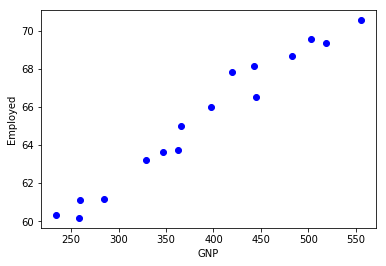

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Import data
raw_data = """
Year,Employed,GNP
1947,60.323,234.289
1948,61.122,259.426
1949,60.171,258.054
1950,61.187,284.599
1951,63.221,328.975
1952,63.639,346.999
1953,64.989,365.385
1954,63.761,363.112
1955,66.019,397.469
1956,67.857,419.18
1957,68.169,442.769
1958,66.513,444.546
1959,68.655,482.704
1960,69.564,502.601
1961,69.331,518.173
1962,70.551,554.894"""

data = []
for line in raw_data.splitlines()[2:]:
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)
n_obs = data.shape[0]
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")

In [8]:
X = np.c_[np.ones(n_obs), data[:, 2]]
Y = data[:, 1]

In [9]:
beta = np.dot(np.linalg.inv(np.dot(X.T, X)),np.dot(X.T, Y))
print(beta)

[5.18435898e+01 3.47522943e-02]


Text(0,0.5,'Employed')

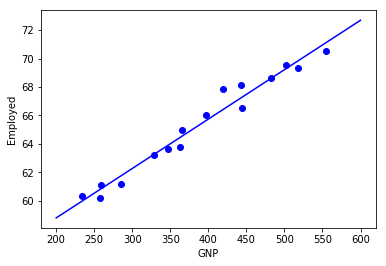

In [10]:
x = np.linspace(200, 600)
plt.plot(x, beta[0] + beta[1]*x, 'b-')
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")

# Exercise 01.3

Analyze the baby names dataset using pandas

In [11]:
import os
path = "C:/Users/mgarciac/Desktop"
os.chdir(path)
os.getcwd()

'C:\\Users\\mgarciac\\Desktop'

In [12]:
import pandas as pd
# Load dataset
names = pd.read_csv('baby-names2.csv')

In [13]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [14]:
names[names.year == 1993].head()   

,year,name,prop,sex,soundex
113000,1993,Michael,0.024010,boy,M240
113001,1993,Christopher,0.018572,boy,C623
113002,1993,Matthew,0.017332,boy,M300
113003,1993,Joshua,0.016268,boy,J200
113004,1993,Tyler,0.014439,boy,T460


### segment the data into boy and girl names

In [15]:
boys = names[names.sex == 'boy'].copy()    
girls = names[names.sex == 'girl'].copy()

### Analyzing the popularity of a name over time

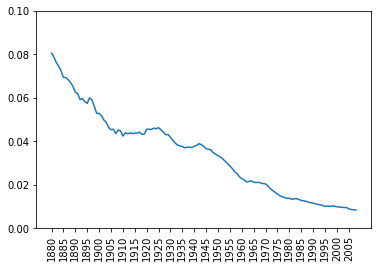

In [16]:
william = boys[boys['name']=='William']

plt.plot(range(william.shape[0]), william['prop'])
plt.xticks(range(william.shape[0])[::5], william['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

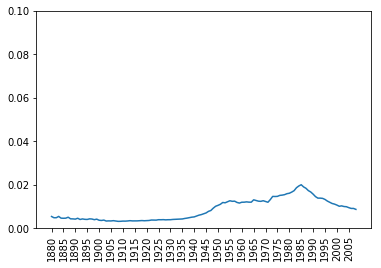

In [17]:
Daniel = boys[boys['name']=='Daniel']

plt.plot(range(Daniel.shape[0]), Daniel['prop'])
plt.xticks(range(Daniel.shape[0])[::5], Daniel['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

# Exercise 01.3

Which has been the most popular boy name every decade?

In [18]:
boys['decada'] = 0
decada=list(range(1880,2020,10))
for i in range(len(decada)-1):
    boys.ix[(boys.year >= decada[i]) & (boys.year < decada[i+1]), 'decada'] = i

C:\Users\mgarciac\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [19]:
boys[:-1].head()

,year,name,prop,sex,soundex,decada
0,1880,John,0.081541,boy,J500,0
1,1880,William,0.080511,boy,W450,0
2,1880,James,0.050057,boy,J520,0
3,1880,Charles,0.045167,boy,C642,0
4,1880,George,0.043292,boy,G620,0


In [20]:
tabla1=pd.pivot_table(boys, index='name', columns='decada', aggfunc=np.mean, values='prop')
tabla1.idxmax()

decada
0        John
1        John
2        John
3        John
4      Robert
5      Robert
6       James
7       James
8     Michael
9     Michael
10    Michael
11    Michael
12      Jacob
dtype: object

# Exercise 01.4

Which has been the most popular girl name?


In [21]:
tabla2=pd.pivot_table(girls, index='name', aggfunc=np.mean, values='prop')
tabla2.idxmax()

prop    Mary
dtype: object

# Exercise 01.5

What is the most popular new girl name? (new is a name that appears only in the 2000's)

In [22]:
girls["decada"]=23
girls.ix[(girls.year<2000),"decada"]="Old"
girls.ix[(girls.year>=2000),"decada"]="New"
base=pd.pivot_table(girls, index='name', columns='decada', values='prop', aggfunc=np.mean)
base.head()

C:\Users\mgarciac\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\mgarciac\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


decada,New,Old
name,,
Aaliyah,0.001747,0.000671
Aaron,NaN,0.000089
Abagail,0.000135,0.000109
Abbey,0.000255,0.000233
Abbie,0.000234,0.000244


In [23]:
base["Nuevo"]=0
base.head()

decada,New,Old,Nuevo
name,,,
Aaliyah,0.001747,0.000671,0
Aaron,NaN,0.000089,0
Abagail,0.000135,0.000109,0
Abbey,0.000255,0.000233,0
Abbie,0.000234,0.000244,0


In [24]:
for i in range(2):
    base.ix[(base.Old >0)&(base.New>0),"Nuevo"]=1
    
base.head()
base2 = base[base.Nuevo==0].copy()

C:\Users\mgarciac\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [25]:
for i in range(2):
    base2.ix[(base2.New >0),"Nuevo"]=1
    
base2.head()

C:\Users\mgarciac\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


decada,New,Old,Nuevo
name,,,
Aaron,NaN,0.000089,0
Achsah,NaN,0.000040,0
Adah,NaN,0.000147,0
Adaline,NaN,0.000087,0
Adalyn,0.000214,NaN,1


In [26]:
del base2["Old"]

In [27]:
base3= base2[base2.Nuevo==1].copy()

In [28]:
final = base3.New
final.idxmax()

'Nevaeh'